In [1]:
# How to open parquet file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [2]:
df = pd.read_csv("../data/processed/dataset.csv")

In [3]:
# Total revenue calculation
df['total_revenue'] = (df['base_passenger_fare'] + df['tolls'] + df['bcf'] +
                       df['congestion_surcharge'] + df['airport_fee'] + df['tips'])

# Revenue per mile
df['revenue_per_mile'] = df['total_revenue'] / df['trip_miles']
df['revenue_per_mile'] = df['revenue_per_mile'].replace([np.inf, -np.inf], np.nan)
# Drop rows with NaN values
df = df.dropna(subset=['revenue_per_mile'])

# Revenue per second
df['revenue_per_second'] = df['total_revenue'] / df['trip_time']
df['revenue_per_second'] = df['revenue_per_second'].replace([np.inf, -np.inf], np.nan)
# Drop rows with NaN values
df = df.dropna(subset=['revenue_per_second'])

# Extract datetime features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek # 0=Monday, 6=Sunday
df['pickup_month'] = df['pickup_datetime'].dt.month

In [4]:
df.head()

,PULocationID,DOLocationID,pickup_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,total_revenue,revenue_per_mile,revenue_per_second,pickup_hour,pickup_dayofweek,pickup_month
0,188,39,2024-01-01 00:00:59,3.327,1024,17.01,0.00,0.47,1.51,0.00,0.0,10.0,27.48,8.259693,0.026836,0,0,1
1,76,77,2024-01-01 00:53:41,1.215,626,18.80,0.00,0.52,1.67,0.00,0.0,0.0,19.32,15.901235,0.030863,0,0,1
2,90,249,2024-01-01 00:33:55,1.430,1115,9.14,0.00,0.25,0.81,2.75,0.0,0.0,12.14,8.489510,0.010888,0,0,1
3,157,82,2024-01-01 00:06:26,3.100,1027,17.85,0.00,0.49,1.58,0.00,0.0,0.0,18.34,5.916129,0.017858,0,0,1
4,56,75,2024-01-01 00:42:58,9.360,1392,27.04,6.94,0.93,3.02,0.00,0.0,0.0,34.91,3.729701,0.025079,0,0,1


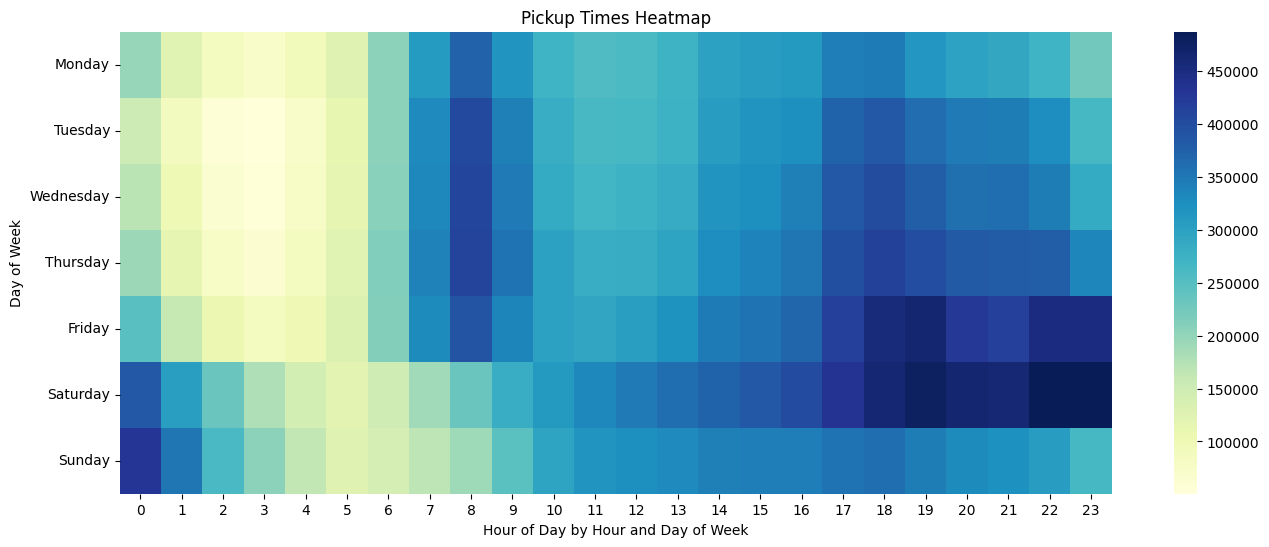

In [12]:
# Heatmap of pickup times by hours and days of the week
pickup_heatmap = df.pivot_table(index='pickup_dayofweek', columns='pickup_hour', values='total_revenue', aggfunc='count', fill_value=0)
plt.figure(figsize=(16, 6))
sns.heatmap(pickup_heatmap, cmap='YlGnBu', annot=False, fmt='d')
plt.title('Pickup Times Heatmap')

# Set yaxis labels to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.yticks(ticks=np.arange(7)+0.5, labels=day_names, rotation=0)
plt.xlabel('Hour of Day by Hour and Day of Week')
plt.ylabel('Day of Week')
plt.show()

In [5]:
# Load taxi zone shapefile
taxi_zones = gpd.read_file("../data/taxi_zones/taxi_zones.shp")
taxi_zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

In [6]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [8]:
taxi_zones.shape

(263, 7)